In [1]:
from kinisi.relationships import StraightLine

In [2]:
from kinisi.parser import PymatgenParser

In [3]:
from kinisi import UREG

In [4]:
da_params = { 'specie': 'Li',
              'time_step': 2.0,
              'step_skip': 50,
              'temperature': 400,
              'min_obs': 50}
from pymatgen.io.vasp import Xdatcar

xd = Xdatcar('/Users/lno76132/work/research/msd_errors/actual_XDATCAR.gz')

In [5]:
data = PymatgenParser(xd.structures, **da_params)

In [6]:
from kinisi import msd

In [7]:
d, dy = msd.bootstrap(data.disp_store[::10])

100%|██████████| 13/13 [00:39<00:00,  3.05s/it]


In [8]:
diff = msd.Diffusion(data.delta_t[::10], d, dy)

In [9]:
print(diff.diffusion_coefficient)

(1.468+/-0.009)e-05 centimeter ** 2 / second


In [10]:
import matplotlib.pyplot as plt

100%|██████████| 1000/1000 [00:05<00:00, 175.86it/s]


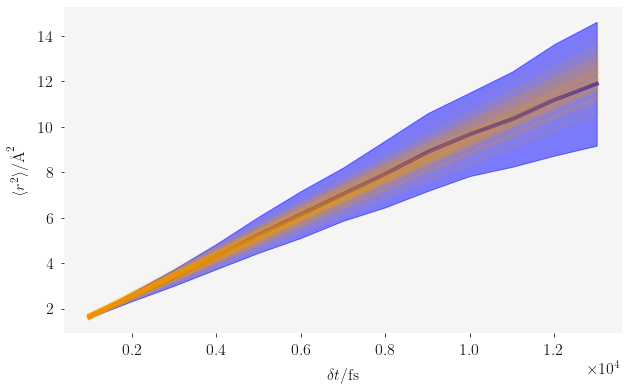

In [11]:
diff.sample()
diff.plot()
plt.show()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1106db400>)

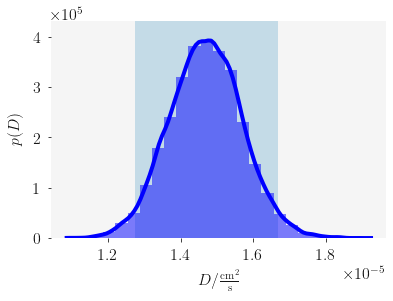

In [12]:
diff.diffusion_coefficient.plot((6, 4))

In [13]:
diff.diffusion_coefficient

Distribution: $D$
Size: 50000
Samples: [1.3984563343279985e-05 1.4679634110268659e-05 ... 1.5384997319988147e-05 1.5203886925880502e-05]
Median: 1.4696643837939537e-05
Symetrical Error: 1.98761884546708e-06
Confidence intervals: [1.2745707838548613e-05 1.6684262683406617e-05]
Confidence interval points: [2.5 97.5]
Reporting Value: (1.47+/-0.20)e-05
Units: centimeter ** 2 / second
Normal: True